<img src='logo_DH.png' align='center' width=35%/>

<h1 style="text-align: center;">Desafío 2 - Modelo de Regresión Lineal</h1>

<a id="section_toc"></a> 
## Tabla de Contenidos

[Introducción y objetivos](#section_intro)

[Importación de librerías y confguración de display()](#section_importacion)

[Importación del archivo properati_desafio_2](#section_properati)

[Inspección de la tabla](#section_inspeccion)

[Regresión](#section_regresión)

---
<a id="section_intro"></a> 
## Introducción y objetivos

[volver a TOC](#section_toc)

La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades para venta y alquiler. Debemos asesorar a la inmobiliaria para desarrollar un modelo de regresión que permita predecir el **precio por metro cuadrado** de una propiedad. 

El objetivo final es que el modelo que desarrollen sea utilizado como **tasador automático** a ser aplicados a las próximas propiedades que sean comercializadas por la empresa. Para ello la empresa le provee de un dataset correspondiente al primer semestre de 2017. El nombre del dataset es *properati.csv*.

En el desafío 1 realizamos los primeros pasos de este objetivo:
- Efectuamos una limpieza del dataset provisto. Lidiamos con los datos perdidos en ciertas variables.
- Realizamos un análisis descriptivo de las principales variables.
- Creamos nuevas columnas a partir de las características dadas que puedan tener valor predictivo. En particular, se calcularon la amenities ya que no lo habíamos realizado.

En este desafío tenemos como objetivo realizar un modelo de regresión lineal que permite predecir el precio por metro cuadrado usando las variables que consideremos relevantes:
- Construcción de variables dummies para realizar el modelo si es necesario.
- Normalización.
- Train/test split del modelo.
- Cross validation.
- Regularización.
- Métricas RMSE y R² (ver para set de entrenamiento y de validación).

---
<a id="section_importacion"></a> 
## Importación de librerías y configuración de display()

[volver a TOC](#section_toc)


En esta parte importamos las librerías que usamos y cambiamos la configuración para tener un display/print correctos/útiles

In [1]:
# Importación de librerias:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re



In [4]:
# Configuraciones de display:
pd.set_option("display.max_columns", 50)   # Limita la visualización a max 50 columnas. Si se excede genera "...".NO existe display.min_columns
pd.set_option("display.max_rows", 700)     # Limita la visualización a max 20 columnas. Si se excede genera "..."
pd.set_option("display.min_rows", 20)      # Una vez que display.max_rows se excede, la display.min_rows determina cuántas filas se muestran.
#pd.reset_option("^display")               # Este comando resetea todas las opciones por defecto.

---
<a id="section_properati"></a> 
## Importación del archivo properati_desafio_2.csv

[volver a TOC](#section_toc)

In [13]:
# Importación del archivo de Properati:
data = pd.read_csv("properati_desafio_2.csv", sep = ",", low_memory=False) # low_memory=False es para que lea el archivo con la mayor cantidad de memoria dsponible y no infiera "mal" un tipo de dato.

In [14]:
# Muestra de la tabla:
data.sample(5)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities
32547,HOUSE,NORDELTA,BS.AS. G.B.A. ZONA NORTE,590000.00,420.0,250.0,1404.761905,2360.000000,NaN,NaN,NaN,BS.AS. G.B.A. ZONA NORTE,1,0,0,0,1,0,2
47098,APARTMENT,CAPITAL FEDERAL,CAPITAL FEDERAL,115000.00,60.0,60.0,1916.666667,1916.666667,NaN,NaN,2500.0,CAPITAL FEDERAL,0,0,0,0,0,0,0
2446,APARTMENT,RINCÓN DE MILBERG,BS.AS. G.B.A. ZONA NORTE,138886.19,75.0,65.0,1851.815867,36629.630769,2.0,NaN,NaN,BS.AS. G.B.A. ZONA NORTE,1,1,0,1,1,1,5
2241,HOUSE,HAEDO,BS.AS. G.B.A. ZONA OESTE,235000.00,210.0,150.0,1119.047619,1566.666667,NaN,5.0,NaN,BS.AS. G.B.A. ZONA OESTE,0,0,0,0,0,0,0
55263,APARTMENT,VILLA DEL PARQUE,CAPITAL FEDERAL,65000.00,26.0,25.0,2500.000000,2600.000000,NaN,NaN,NaN,CAPITAL FEDERAL,0,0,0,1,0,1,2


---
<a id="section_inspeccion"></a> 
## Inspección de la tabla

[volver a TOC](#section_toc)

Se realiza un análisis básico para recordar las variables importantes para este modelo.

In [15]:
# Dimensiones:
print("Dimensiones de la tabla: ", data.shape)

Dimensiones de la tabla:  (60678, 19)


In [16]:
# Tipo de datos de las columnas:
data.dtypes

property_type             object
place_name                object
state_name                object
price_aprox_usd          float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
price_usd_per_m2         float64
price_per_m2             float64
floor                    float64
rooms                    float64
expenses                 float64
centro_urbano             object
pileta                     int64
parrilla                   int64
quincho                    int64
patio                      int64
cochera                    int64
balcon                     int64
amenities                  int64
dtype: object

Analizando las columnas una a una podemos ver que los tipos de datos son los correctos segun muestra el df.

In [17]:
# Para evitar inconvenientes en el análisis pasamos todos los strings a uppercase():
data = data.applymap(lambda x: x.upper() if type(x) == str else x)
display(data.sample(3))

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities
55235,HOUSE,ESCOBAR,BS.AS. G.B.A. ZONA NORTE,145000.0,195.0,120.0,743.589744,1208.333333,NaN,NaN,NaN,BS.AS. G.B.A. ZONA NORTE,1,1,1,1,1,0,5
6298,HOUSE,ESCOBAR,BS.AS. G.B.A. ZONA NORTE,240000.0,198.0,198.0,1212.121212,1212.121212,NaN,NaN,NaN,BS.AS. G.B.A. ZONA NORTE,0,0,0,1,0,0,1
36815,APARTMENT,FLORESTA,CAPITAL FEDERAL,145000.0,75.0,71.0,1933.333333,2042.253521,NaN,NaN,4000.0,CAPITAL FEDERAL,0,0,0,0,1,1,2


In [18]:
# Porcentaje de nulos por columnas:
(data.isnull().sum()/data.shape[0]*100).round(2)

property_type             0.00
place_name                0.03
state_name                0.00
price_aprox_usd           0.00
surface_total_in_m2       0.00
surface_covered_in_m2     7.82
price_usd_per_m2          0.00
price_per_m2              7.82
floor                    95.11
rooms                    54.77
expenses                 83.17
centro_urbano             0.00
pileta                    0.00
parrilla                  0.00
quincho                   0.00
patio                     0.00
cochera                   0.00
balcon                    0.00
amenities                 0.00
dtype: float64

---
<a id="section_regresion"></a> 
## Regresión

[volver a TOC](#section_toc)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000025E26295828> (for post_execute):


KeyboardInterrupt: 

Text(0.5, 1.0, 'Mapa de covarianza de variables numericas')

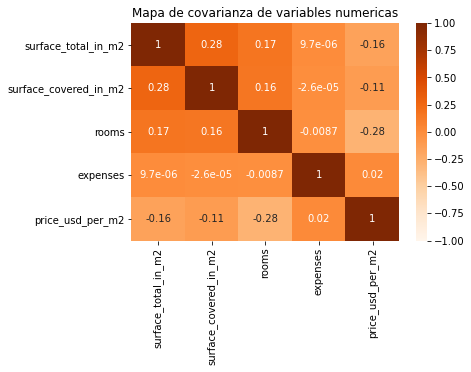

In [77]:
# Graficamos un heatmap con las variables numericas que pueden ser utilizadas en el modelo:
data_numerico_mask = data[['surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'expenses', 'price_usd_per_m2']]

sns.heatmap(data_numerico_mask.corr(), annot=True, vmin=-1, cmap='Oranges').set_title('Mapa de covarianza de variables numericas')

(0.0, 7923.390014810531)

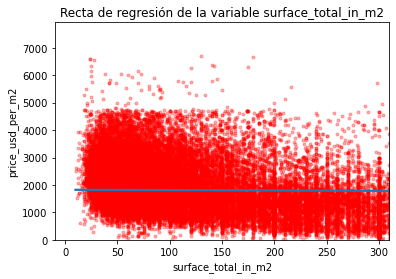

In [78]:
# Graficamos una recta de regresión de la variable surface_total_in_m2:
sns.regplot(data.surface_total_in_m2, data.price_usd_per_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9,'alpha':.3}).set_title('Recta de regresión de la variable surface_total_in_m2')
plt.xlim(-10,310)
plt.ylim(bottom=0)

(0.0, 7509.694278450957)

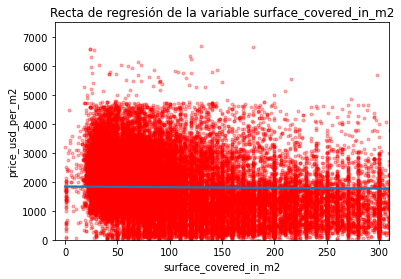

In [79]:
#Graficamos una recta de regresión de la variable surface_covered_in_m2:
sns.regplot(data.surface_covered_in_m2, data.price_usd_per_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9, 'alpha':.3}).set_title('Recta de regresión de la variable surface_covered_in_m2')
plt.xlim(-10,310)
plt.ylim(bottom=0)

(0.0, 6427.900145016259)

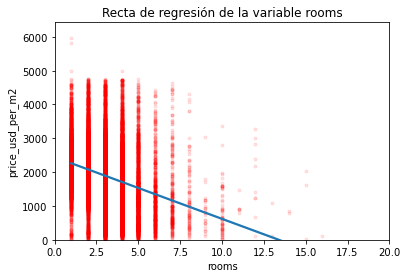

In [82]:
#Graficamos una recta de regresión de la variable rooms:
sns.regplot(data.rooms, data.price_usd_per_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9,'alpha':.1}).set_title('Recta de regresión de la variable rooms')
plt.xlim(0,20)
plt.ylim(bottom=0)

Text(0.5, 1.0, 'Boxplot de la variable property type')

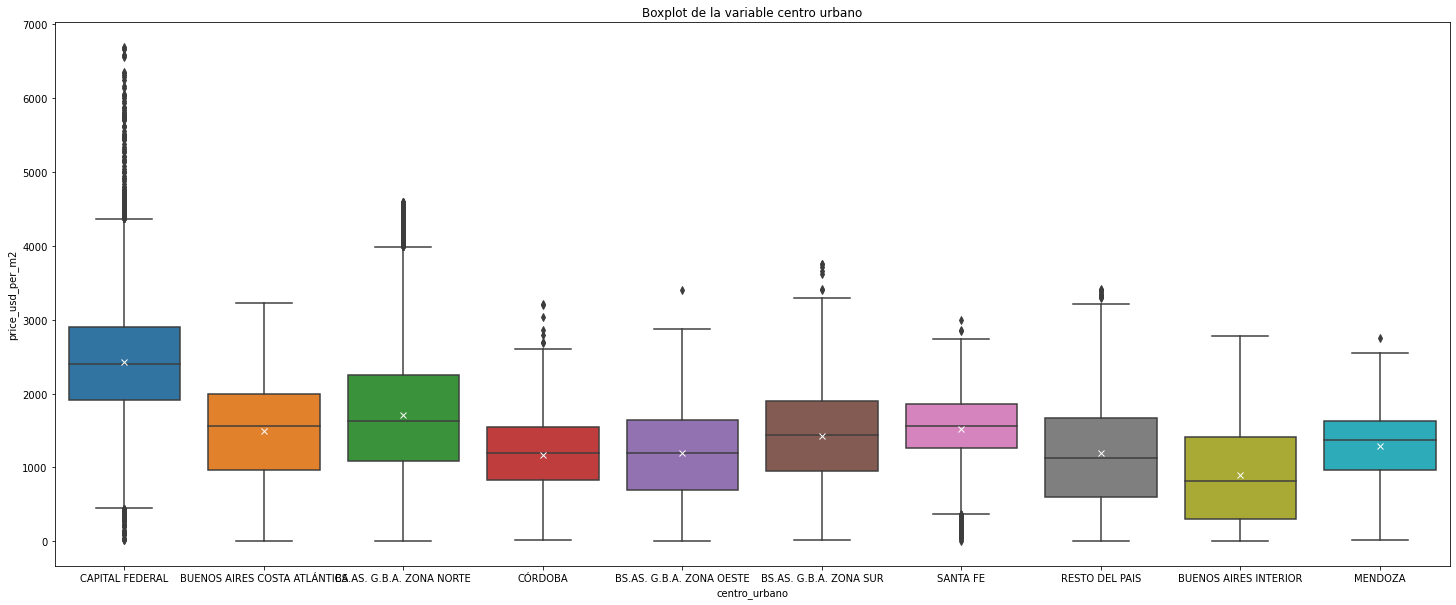

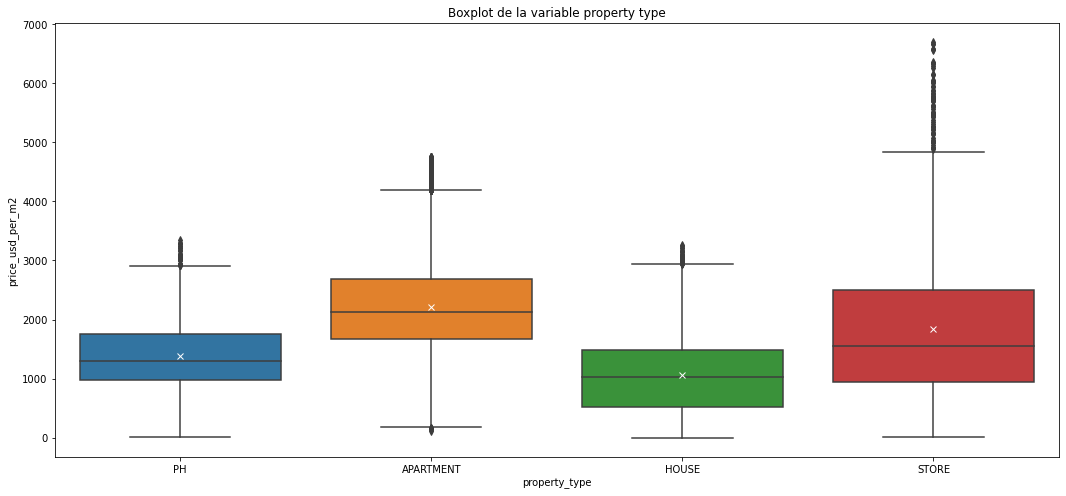

In [86]:
#Analizamos la distribución de las variables categoricas para verificar cuales podrían aportar mayor información al modelo:
plt.figure(figsize=(25,10))
sns.boxplot(x = 'centro_urbano', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable centro urbano')

plt.figure(figsize=(18,8))
sns.boxplot(x = 'property_type', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable property type')

In [24]:
#cuanto mayor es la diferencia en el promedio entre las variables, mas va a aportar al modelo

Text(0.5, 1.0, 'Boxplot de la variable state_name')

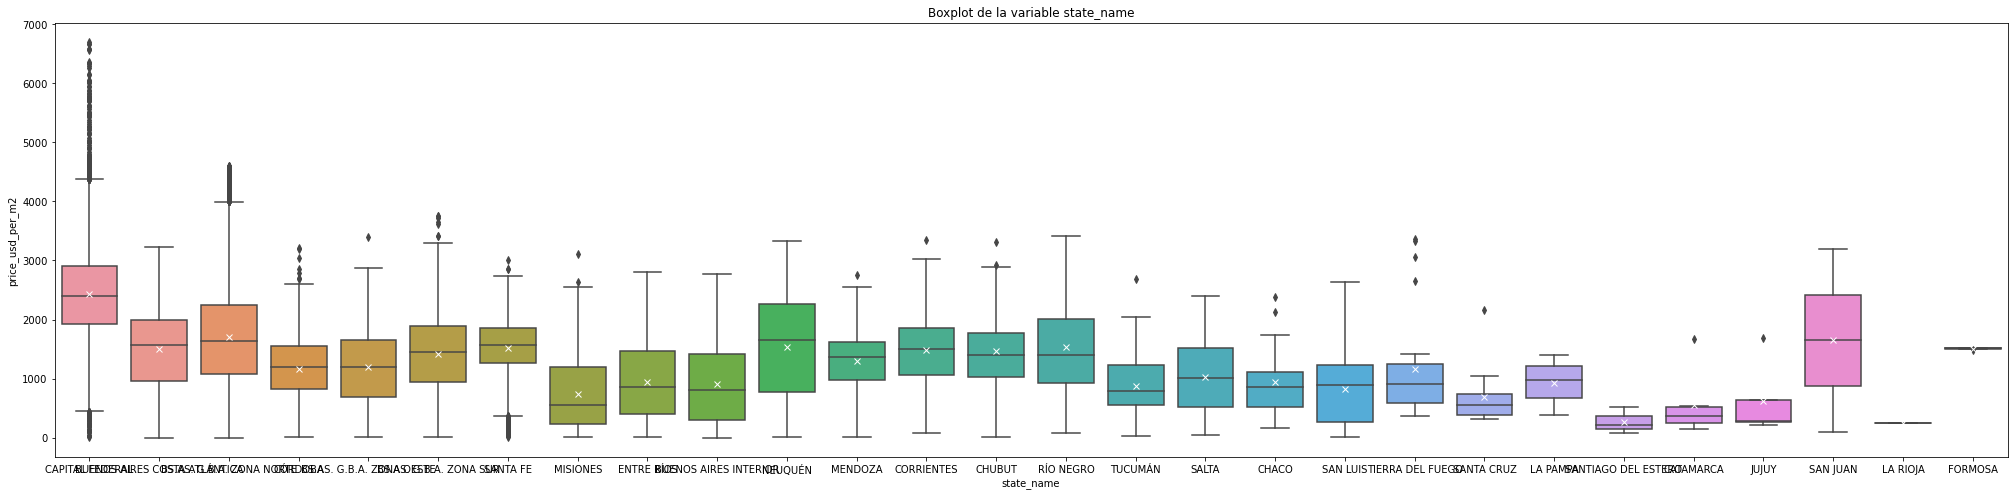

In [91]:
plt.figure(figsize=(35,8))
sns.boxplot(x = 'state_name', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable state_name')

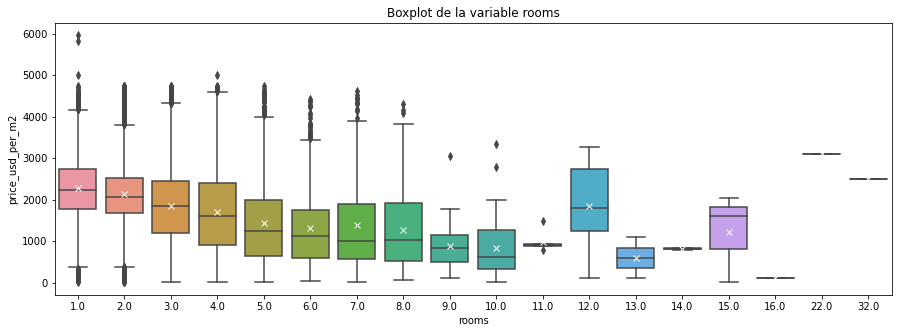

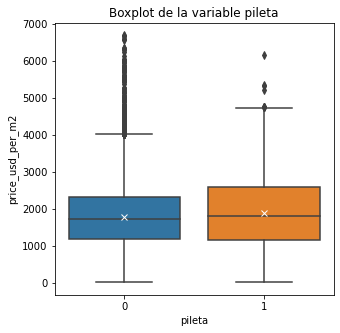

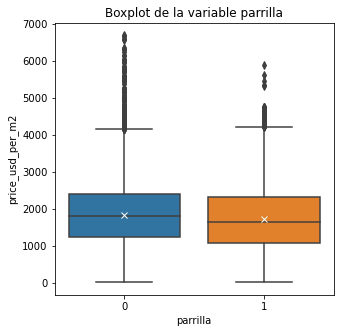

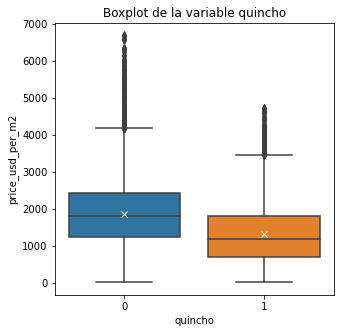

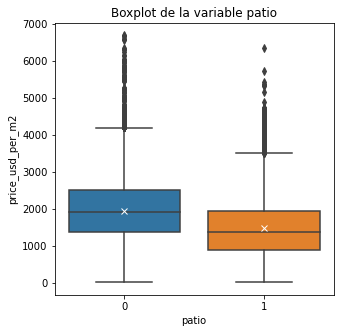

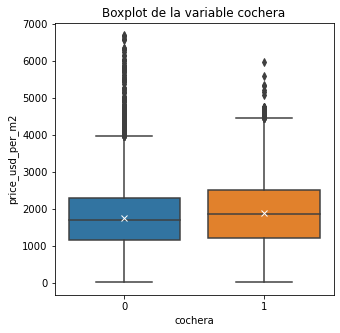

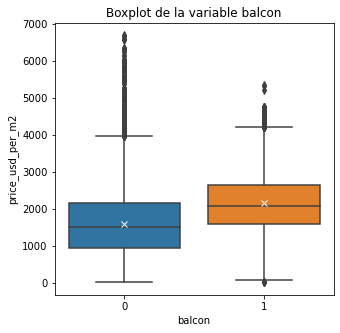

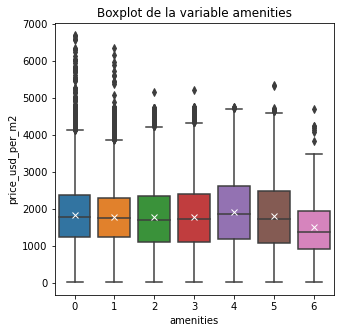

In [98]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'rooms', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable rooms');
plt.figure(figsize=(5,5))
sns.boxplot(x = 'pileta', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable pileta');
plt.figure(figsize=(5,5))
sns.boxplot(x = 'parrilla', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable parrilla');
plt.figure(figsize=(5,5))
sns.boxplot(x = 'quincho', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable quincho');
plt.figure(figsize=(5,5))
sns.boxplot(x = 'patio', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable patio');
plt.figure(figsize=(5,5))
sns.boxplot(x = 'cochera', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable cochera');
plt.figure(figsize=(5,5))
sns.boxplot(x = 'balcon', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable balcon');
plt.figure(figsize=(5,5))
sns.boxplot(x = 'amenities', y = 'price_usd_per_m2', data=data,
           showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'}).set_title('Boxplot de la variable amenities');

In [94]:
#Transformamos la variable centro_urbano en variable dummies:
centrourbano_dummies = pd.get_dummies(data.centro_urbano, drop_first = True, prefix='dummy')
data = pd.concat([data, centrourbano_dummies], axis=1, sort=False)
data.head(2)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,...,rooms_dummy__15.0,rooms_dummy__16.0,rooms_dummy__22.0,rooms_dummy__32.0,amenities_dummy__1,amenities_dummy__2,amenities_dummy__3,amenities_dummy__4,amenities_dummy__5,amenities_dummy__6,amenities_dummy__1,amenities_dummy__2,amenities_dummy__3,amenities_dummy__4,amenities_dummy__5,amenities_dummy__6,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,dummy_MENDOZA,dummy_RESTO DEL PAIS,dummy_SANTA FE
0,PH,MATADEROS,CAPITAL FEDERAL,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,APARTMENT,MATADEROS,CAPITAL FEDERAL,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [95]:
#Transformamos la variable property_type en variable dummies:
property_type_dummies = pd.get_dummies(data.property_type, drop_first = True, prefix='dummy')
data = pd.concat([data, property_type_dummies], axis=1, sort=False)
data.head(2)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,...,rooms_dummy__32.0,amenities_dummy__1,amenities_dummy__2,amenities_dummy__3,amenities_dummy__4,amenities_dummy__5,amenities_dummy__6,amenities_dummy__1,amenities_dummy__2,amenities_dummy__3,amenities_dummy__4,amenities_dummy__5,amenities_dummy__6,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,dummy_MENDOZA,dummy_RESTO DEL PAIS,dummy_SANTA FE,dummy_HOUSE,dummy_PH,dummy_STORE
0,PH,MATADEROS,CAPITAL FEDERAL,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,APARTMENT,MATADEROS,CAPITAL FEDERAL,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [96]:
#Transformamos la variable state_name en variable dummies:
state_name_dummies = pd.get_dummies(data.state_name, drop_first = True, prefix='state_dummy_')
data = pd.concat([data, state_name_dummies], axis=1, sort=False)
data.head(2)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,...,state_dummy__BUENOS AIRES COSTA ATLÁNTICA,state_dummy__BUENOS AIRES INTERIOR,state_dummy__CAPITAL FEDERAL,state_dummy__CATAMARCA,state_dummy__CHACO,state_dummy__CHUBUT,state_dummy__CORRIENTES,state_dummy__CÓRDOBA,state_dummy__ENTRE RÍOS,state_dummy__FORMOSA,state_dummy__JUJUY,state_dummy__LA PAMPA,state_dummy__LA RIOJA,state_dummy__MENDOZA,state_dummy__MISIONES,state_dummy__NEUQUÉN,state_dummy__RÍO NEGRO,state_dummy__SALTA,state_dummy__SAN JUAN,state_dummy__SAN LUIS,state_dummy__SANTA CRUZ,state_dummy__SANTA FE,state_dummy__SANTIAGO DEL ESTERO,state_dummy__TIERRA DEL FUEGO,state_dummy__TUCUMÁN
0,PH,MATADEROS,CAPITAL FEDERAL,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,APARTMENT,MATADEROS,CAPITAL FEDERAL,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
#Importamos bibliotecas:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [119]:
#Armamos una función para probar diferentes combinaciones de variables:
def train_test(feature_cols):
    X = data[feature_cols]
    y = data.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred_test = lm.predict(X_test)
    y_pred_train = lm.predict(X_train)
    
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)
    cross_ = cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=3)
    print('La media del error absoluto es', mae.round(2))
    print('La raíz del error cuadrático medio', rmse.round(2))
        
    print('El R2 de entrenamiento del modelo es', r2_score(y_train, y_pred_train).round(2))
    print('El R2 de testeo del modelo es', r2_score(y_test, y_pred_test).round(2))
    print('La validación cruzada:', cross_, 'y su promedio:', cross_.mean().round(2))
    return

In [34]:
#Modelo con 1 variable numerica:
feature_cols1 = ['surface_total_in_m2']
modelo_1 = train_test(feature_cols)
modelo_1

La media del error absoluto es 710.18
La raíz del error cuadrático medio 911.48
El R2 de entrenamiento del modelo es 0.03
El R2 de testeo del modelo es 0.01
La validación cruzada: [0.0256455  0.0271678  0.03706463] y su promedio: 0.03


In [35]:
#Modelo con 1 variable numerica y dummies de centro urbano:
feature_cols2 = ['surface_total_in_m2', 'dummy_BS.AS. G.B.A. ZONA OESTE', 'dummy_BS.AS. G.B.A. ZONA SUR',
       'dummy_BUENOS AIRES COSTA ATLÁNTICA', 'dummy_BUENOS AIRES INTERIOR',
       'dummy_CAPITAL FEDERAL', 'dummy_CÓRDOBA', 'dummy_MENDOZA',
       'dummy_RESTO DEL PAIS', 'dummy_SANTA FE']
modelo_2 = train_test(feature_cols)
modelo_2

La media del error absoluto es 597.46
La raíz del error cuadrático medio 775.32
El R2 de entrenamiento del modelo es 0.3
El R2 de testeo del modelo es 0.28
La validación cruzada: [0.29083679 0.29280012 0.30254322] y su promedio: 0.3


In [36]:
#Le agregamos property_type:
feature_cols3 = ['surface_total_in_m2', 'dummy_BS.AS. G.B.A. ZONA OESTE', 'dummy_BS.AS. G.B.A. ZONA SUR',
       'dummy_BUENOS AIRES COSTA ATLÁNTICA', 'dummy_BUENOS AIRES INTERIOR',
       'dummy_CAPITAL FEDERAL', 'dummy_CÓRDOBA', 'dummy_MENDOZA',
       'dummy_RESTO DEL PAIS', 'dummy_SANTA FE', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE']
modelo_3 = train_test(feature_cols)
modelo_3

La media del error absoluto es 505.63
La raíz del error cuadrático medio 655.95
El R2 de entrenamiento del modelo es 0.49
El R2 de testeo del modelo es 0.48
La validación cruzada: [0.49129092 0.49194706 0.49644322] y su promedio: 0.49


In [37]:
#Le agregamos la variable state_name dummie:
feature_cols4 = ['surface_total_in_m2', 'dummy_BS.AS. G.B.A. ZONA OESTE', 'dummy_BS.AS. G.B.A. ZONA SUR',
       'dummy_BUENOS AIRES COSTA ATLÁNTICA', 'dummy_BUENOS AIRES INTERIOR',
       'dummy_CAPITAL FEDERAL', 'dummy_CÓRDOBA', 'dummy_MENDOZA',
       'dummy_RESTO DEL PAIS', 'dummy_SANTA FE', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN']
modelo_4 = train_test(feature_cols)
modelo_4

La media del error absoluto es 503.26
La raíz del error cuadrático medio 653.61
El R2 de entrenamiento del modelo es 0.5
El R2 de testeo del modelo es 0.49
La validación cruzada: [0.494354   0.49566498 0.49993514] y su promedio: 0.5


In [38]:
#El modelo con variable state_name explica levemente mejor que con variable centro_urbano:
feature_cols5 = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN']
modelo_5 = train_test(feature_cols)
modelo_5

La media del error absoluto es 503.26
La raíz del error cuadrático medio 653.58
El R2 de entrenamiento del modelo es 0.5
El R2 de testeo del modelo es 0.49
La validación cruzada: [0.494354   0.49540316 0.49993514] y su promedio: 0.5


In [97]:
#Transformamos la variable rooms en dummies:
rooms_dummies = pd.get_dummies(data.rooms, drop_first = True, prefix='rooms_dummy_')
data = pd.concat([data, rooms_dummies], axis=1, sort=False)
data.head(2)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,...,state_dummy__SALTA,state_dummy__SAN JUAN,state_dummy__SAN LUIS,state_dummy__SANTA CRUZ,state_dummy__SANTA FE,state_dummy__SANTIAGO DEL ESTERO,state_dummy__TIERRA DEL FUEGO,state_dummy__TUCUMÁN,rooms_dummy__2.0,rooms_dummy__3.0,rooms_dummy__4.0,rooms_dummy__5.0,rooms_dummy__6.0,rooms_dummy__7.0,rooms_dummy__8.0,rooms_dummy__9.0,rooms_dummy__10.0,rooms_dummy__11.0,rooms_dummy__12.0,rooms_dummy__13.0,rooms_dummy__14.0,rooms_dummy__15.0,rooms_dummy__16.0,rooms_dummy__22.0,rooms_dummy__32.0
0,PH,MATADEROS,CAPITAL FEDERAL,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,APARTMENT,MATADEROS,CAPITAL FEDERAL,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
#Le agregamos al modelo la variable rooms:
feature_cols6 = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN', 'rooms_dummy__2.0', 'rooms_dummy__3.0', 'rooms_dummy__4.0',
       'rooms_dummy__5.0', 'rooms_dummy__6.0', 'rooms_dummy__7.0',
       'rooms_dummy__8.0', 'rooms_dummy__9.0', 'rooms_dummy__10.0',
       'rooms_dummy__11.0', 'rooms_dummy__12.0', 'rooms_dummy__13.0',
       'rooms_dummy__14.0', 'rooms_dummy__15.0', 'rooms_dummy__16.0',
       'rooms_dummy__22.0', 'rooms_dummy__32.0']
modelo_6 = train_test(feature_cols6)
modelo_6

La media del error absoluto es 500.96
La raíz del error cuadrático medio 652.63
El R2 de entrenamiento del modelo es 0.5
El R2 de testeo del modelo es 0.49
La validación cruzada: [0.4963051  0.49664268 0.50287859] y su promedio: 0.5


In [103]:
#Le agregamos al modelo la variable pileta:
feature_cols7 = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN', 'rooms_dummy__2.0', 'rooms_dummy__3.0', 'rooms_dummy__4.0',
       'rooms_dummy__5.0', 'rooms_dummy__6.0', 'rooms_dummy__7.0',
       'rooms_dummy__8.0', 'rooms_dummy__9.0', 'rooms_dummy__10.0',
       'rooms_dummy__11.0', 'rooms_dummy__12.0', 'rooms_dummy__13.0',
       'rooms_dummy__14.0', 'rooms_dummy__15.0', 'rooms_dummy__16.0',
       'rooms_dummy__22.0', 'rooms_dummy__32.0', 'pileta']
modelo_7 = train_test(feature_cols7)
modelo_7

La media del error absoluto es 495.26
La raíz del error cuadrático medio 645.64
El R2 de entrenamiento del modelo es 0.51
El R2 de testeo del modelo es 0.5
La validación cruzada: [0.51093653 0.511362   0.51489352] y su promedio: 0.51


In [104]:
feature_cols8 = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN', 'rooms_dummy__2.0', 'rooms_dummy__3.0', 'rooms_dummy__4.0',
       'rooms_dummy__5.0', 'rooms_dummy__6.0', 'rooms_dummy__7.0',
       'rooms_dummy__8.0', 'rooms_dummy__9.0', 'rooms_dummy__10.0',
       'rooms_dummy__11.0', 'rooms_dummy__12.0', 'rooms_dummy__13.0',
       'rooms_dummy__14.0', 'rooms_dummy__15.0', 'rooms_dummy__16.0',
       'rooms_dummy__22.0', 'rooms_dummy__32.0', 'pileta', 'parrilla']
modelo_8 = train_test(feature_cols8)
modelo_8

La media del error absoluto es 495.27
La raíz del error cuadrático medio 645.65
El R2 de entrenamiento del modelo es 0.51
El R2 de testeo del modelo es 0.5
La validación cruzada: [0.51065449 0.51121268 0.51488591] y su promedio: 0.51


In [105]:
feature_cols9 = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN', 'rooms_dummy__2.0', 'rooms_dummy__3.0', 'rooms_dummy__4.0',
       'rooms_dummy__5.0', 'rooms_dummy__6.0', 'rooms_dummy__7.0',
       'rooms_dummy__8.0', 'rooms_dummy__9.0', 'rooms_dummy__10.0',
       'rooms_dummy__11.0', 'rooms_dummy__12.0', 'rooms_dummy__13.0',
       'rooms_dummy__14.0', 'rooms_dummy__15.0', 'rooms_dummy__16.0',
       'rooms_dummy__22.0', 'rooms_dummy__32.0', 'pileta', 'quincho']
modelo_9 = train_test(feature_cols9)
modelo_9

La media del error absoluto es 494.96
La raíz del error cuadrático medio 645.29
El R2 de entrenamiento del modelo es 0.51
El R2 de testeo del modelo es 0.5
La validación cruzada: [0.51118942 0.51176187 0.51507284] y su promedio: 0.51


In [106]:
feature_cols10 = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN', 'rooms_dummy__2.0', 'rooms_dummy__3.0', 'rooms_dummy__4.0',
       'rooms_dummy__5.0', 'rooms_dummy__6.0', 'rooms_dummy__7.0',
       'rooms_dummy__8.0', 'rooms_dummy__9.0', 'rooms_dummy__10.0',
       'rooms_dummy__11.0', 'rooms_dummy__12.0', 'rooms_dummy__13.0',
       'rooms_dummy__14.0', 'rooms_dummy__15.0', 'rooms_dummy__16.0',
       'rooms_dummy__22.0', 'rooms_dummy__32.0', 'pileta', 'quincho', 'patio']
modelo_10 = train_test(feature_cols10)
modelo_10

La media del error absoluto es 494.81
La raíz del error cuadrático medio 645.13
El R2 de entrenamiento del modelo es 0.51
El R2 de testeo del modelo es 0.5
La validación cruzada: [0.51165747 0.51238003 0.51533879] y su promedio: 0.51


In [107]:
feature_cols11 = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN', 'rooms_dummy__2.0', 'rooms_dummy__3.0', 'rooms_dummy__4.0',
       'rooms_dummy__5.0', 'rooms_dummy__6.0', 'rooms_dummy__7.0',
       'rooms_dummy__8.0', 'rooms_dummy__9.0', 'rooms_dummy__10.0',
       'rooms_dummy__11.0', 'rooms_dummy__12.0', 'rooms_dummy__13.0',
       'rooms_dummy__14.0', 'rooms_dummy__15.0', 'rooms_dummy__16.0',
       'rooms_dummy__22.0', 'rooms_dummy__32.0', 'pileta', 'quincho', 'patio', 'cochera']
modelo_11 = train_test(feature_cols11)
modelo_11

La media del error absoluto es 491.51
La raíz del error cuadrático medio 640.13
El R2 de entrenamiento del modelo es 0.52
El R2 de testeo del modelo es 0.51
La validación cruzada: [0.51930366 0.51999098 0.52390291] y su promedio: 0.52


In [163]:
feature_cols12 = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN', 'rooms_dummy__2.0', 'rooms_dummy__3.0', 'rooms_dummy__4.0',
       'rooms_dummy__5.0', 'rooms_dummy__6.0', 'rooms_dummy__7.0',
       'rooms_dummy__8.0', 'rooms_dummy__9.0', 'rooms_dummy__10.0',
       'rooms_dummy__11.0', 'rooms_dummy__12.0', 'rooms_dummy__13.0',
       'rooms_dummy__14.0', 'rooms_dummy__15.0', 'rooms_dummy__16.0',
       'rooms_dummy__22.0', 'rooms_dummy__32.0', 'pileta', 'quincho', 'patio', 'cochera', 'balcon']
modelo_12 = train_test(feature_cols12)
modelo_12

La media del error absoluto es 490.63
La raíz del error cuadrático medio 638.97
El R2 de entrenamiento del modelo es 0.52
El R2 de testeo del modelo es 0.51
La validación cruzada: [0.52130369 0.52154183 0.52520676] y su promedio: 0.52


In [109]:
feature_cols13 = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN', 'rooms_dummy__2.0', 'rooms_dummy__3.0', 'rooms_dummy__4.0',
       'rooms_dummy__5.0', 'rooms_dummy__6.0', 'rooms_dummy__7.0',
       'rooms_dummy__8.0', 'rooms_dummy__9.0', 'rooms_dummy__10.0',
       'rooms_dummy__11.0', 'rooms_dummy__12.0', 'rooms_dummy__13.0',
       'rooms_dummy__14.0', 'rooms_dummy__15.0', 'rooms_dummy__16.0',
       'rooms_dummy__22.0', 'rooms_dummy__32.0', 'pileta', 'quincho', 'patio', 'cochera', 'balcon', 'amenities']
modelo_13 = train_test(feature_cols13)
modelo_13

La media del error absoluto es 490.8
La raíz del error cuadrático medio 638.99
El R2 de entrenamiento del modelo es 0.52
El R2 de testeo del modelo es 0.51
La validación cruzada: [0.52083536 0.52173422 0.52538926] y su promedio: 0.52


In [110]:
amenities_dummies = pd.get_dummies(data.amenities, drop_first = True, prefix='amenities_dummy_')
data = pd.concat([data, amenities_dummies], axis=1, sort=False)
data.head(2)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities,dummy_BS.AS. G.B.A. ZONA OESTE,dummy_BS.AS. G.B.A. ZONA SUR,dummy_BUENOS AIRES COSTA ATLÁNTICA,dummy_BUENOS AIRES INTERIOR,dummy_CAPITAL FEDERAL,dummy_CÓRDOBA,...,state_dummy__TIERRA DEL FUEGO,state_dummy__TUCUMÁN,rooms_dummy__2.0,rooms_dummy__3.0,rooms_dummy__4.0,rooms_dummy__5.0,rooms_dummy__6.0,rooms_dummy__7.0,rooms_dummy__8.0,rooms_dummy__9.0,rooms_dummy__10.0,rooms_dummy__11.0,rooms_dummy__12.0,rooms_dummy__13.0,rooms_dummy__14.0,rooms_dummy__15.0,rooms_dummy__16.0,rooms_dummy__22.0,rooms_dummy__32.0,amenities_dummy__1,amenities_dummy__2,amenities_dummy__3,amenities_dummy__4,amenities_dummy__5,amenities_dummy__6
0,PH,MATADEROS,CAPITAL FEDERAL,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,APARTMENT,MATADEROS,CAPITAL FEDERAL,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
feature_cols14 = ['surface_total_in_m2', 'dummy_HOUSE', 'dummy_PH', 'dummy_STORE', 'state_dummy__BS.AS. G.B.A. ZONA OESTE',
       'state_dummy__BS.AS. G.B.A. ZONA SUR',
       'state_dummy__BUENOS AIRES COSTA ATLÁNTICA',
       'state_dummy__BUENOS AIRES INTERIOR', 'state_dummy__CAPITAL FEDERAL',
       'state_dummy__CATAMARCA', 'state_dummy__CHACO', 'state_dummy__CHUBUT',
       'state_dummy__CORRIENTES', 'state_dummy__CÓRDOBA',
       'state_dummy__ENTRE RÍOS', 'state_dummy__FORMOSA', 'state_dummy__JUJUY',
       'state_dummy__LA PAMPA', 'state_dummy__LA RIOJA',
       'state_dummy__MENDOZA', 'state_dummy__MISIONES', 'state_dummy__NEUQUÉN',
       'state_dummy__RÍO NEGRO', 'state_dummy__SALTA', 'state_dummy__SAN JUAN',
       'state_dummy__SAN LUIS', 'state_dummy__SANTA CRUZ',
       'state_dummy__SANTA FE', 'state_dummy__SANTIAGO DEL ESTERO',
       'state_dummy__TIERRA DEL FUEGO', 'state_dummy__TUCUMÁN', 'rooms_dummy__2.0', 'rooms_dummy__3.0', 'rooms_dummy__4.0',
       'rooms_dummy__5.0', 'rooms_dummy__6.0', 'rooms_dummy__7.0',
       'rooms_dummy__8.0', 'rooms_dummy__9.0', 'rooms_dummy__10.0',
       'rooms_dummy__11.0', 'rooms_dummy__12.0', 'rooms_dummy__13.0',
       'rooms_dummy__14.0', 'rooms_dummy__15.0', 'rooms_dummy__16.0',
       'rooms_dummy__22.0', 'rooms_dummy__32.0', 'amenities_dummy__1',
       'amenities_dummy__2', 'amenities_dummy__3', 'amenities_dummy__4',
       'amenities_dummy__5', 'amenities_dummy__6', 'amenities_dummy__1',
       'amenities_dummy__2', 'amenities_dummy__3', 'amenities_dummy__4',
       'amenities_dummy__5', 'amenities_dummy__6']
modelo_14 = train_test(feature_cols14)
modelo_14

La media del error absoluto es 494.76
La raíz del error cuadrático medio 645.23
El R2 de entrenamiento del modelo es 0.51
El R2 de testeo del modelo es 0.5
La validación cruzada: [0.51022644 0.50797184 0.51435513] y su promedio: 0.51


In [126]:
def train_test_ridge(feature_cols):
    X = data[feature_cols]
    y = data.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10], normalize=True, cv=3)
    lm_ridge.fit(X_train, y_train)
    y_pred_test = lm_ridge.predict(X_test)
    y_pred_train = lm_ridge.predict(X_train)
    
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)
    cross_ = cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=3)
    
    print('La raíz del error cuadrático medio', rmse.round(2))
    print('El R2 de testeo del modelo es', r2.round(2), 'y el mejor alpha para ese modelo es:', lm_ridge.alpha_)
    
    return

In [127]:
#El modelo12 fue el que tuvo mejor combinación de r2 y RMSE, por lo tanto probamos una regularización de ridge para verificar si mejoran los resultados:
modelo12_ridge = train_test_ridge(feature_cols12)
modelo12_ridge

La raíz del error cuadrático medio 638.93
El R2 de testeo del modelo es 0.51 y el mejor alpha para ese modelo es: 0.005


In [188]:
modelo12_ = train_test(feature_cols12)
modelo12_

La media del error absoluto es 490.63
La raíz del error cuadrático medio 638.97
El R2 de entrenamiento del modelo es 0.52
El R2 de testeo del modelo es 0.51
La validación cruzada: [0.52130369 0.52154183 0.52520676] y su promedio: 0.52


In [186]:
# ==> ESTOY INTENTANDO HACER LASSO PERO ME GENERA ERROR
def train_test_lasso(feature_cols):
    X = data[feature_cols]
    y = data.price_usd_per_m2
    y.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10], normalize=True, cv=3)
    model_Lasso = lm_lasso.fit(X_train, y_train)
    y_pred_test = lm_lasso.predict(X_test)
    y_pred_train = lm_lasso.predict(X_train)
    
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = model_Lasso.score(y_test, y_pred_test)
        
    print('La raíz del error cuadrático medio', rmse.round(2))
    print('El R2 de testeo del modelo es', r2.round(2))
    
    return

In [187]:
modelo12_lasso = train_test_lasso(feature_cols12)
modelo12_lasso

ValueError: Expected 2D array, got 1D array instead:
array=[1453.33333333 2750.         2190.71461538 ... 1340.50632911 1620.68965517
  316.66666667].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Modelo 12


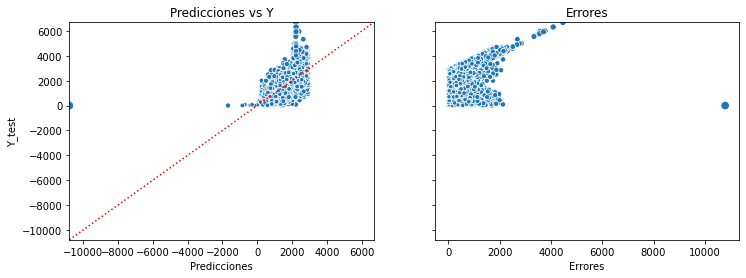

In [190]:
# INTENTO DE GRAFICO PARA MODELO Y ERRORES
X = data[feature_cols12]
y = data.price_usd_per_m2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
lm = LinearRegression()
modelo = lm.fit(X_train, y_train)
    
def plot_y(modelo, X, Y):
    
    pred = modelo.predict(X)
    errores = (Y - pred).abs()
    
    if pred.max() > Y.max():
        maxi = pred.max()
    else:
        maxi = Y.max()
    if pred.min() < Y.min():
        mini = pred.min()
    else:
        mini = Y.min()
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4), sharey=True)
    sns.scatterplot(x=pred, y=Y, ax=ax1, size=(errores).tolist(), legend=False)
    ax1.set_title('Predicciones vs Y')
    ax1.set_ylim(mini,maxi),ax1.set_xlim(mini,maxi),ax1.set_xlabel('Predicciones'),ax1.set_ylabel('Y_test')
    ax1.plot([0, 1], [0, 1], transform=ax1.transAxes, color='red',linestyle=':')
    sns.scatterplot(x=errores, y=Y, ax=ax2, size=(errores).tolist(),legend=False)
    ax2.set_title('Errores')
    ax2.set_xlabel('Errores'),ax2.set_ylabel('Y_test')
    plt.show();

# vemos diferencia entre el primer modelo y el segundo
print('Modelo 12')
plot_y(modelo=modelo, X=X_test, Y=y_test)
#print('Modelo 4')
#plot_y(modelo=lm_1, X=A_test, Y=Z_test)